In [2]:
import numpy as np
import tensorflow as tf


# a concise way to implement C-like structures. 
# ref: https://stackoverflow.com/questions/1878710/struct-objects-in-python
config = lambda: 0
# note: put a comma after `tf.random_normal` will make it viewed as a tuple cuz it's not dict!...
config.weights_initializer = tf.random_normal
config.bias_initializer = tf.zeros
config.feature_dimension = 2
config.num_of_class = 2
config.training_epochs = 1000


class NN():
    def __init__(self, config):
        self.config = config
        self.W = tf.Variable(self.config.weights_initializer([
            self.config.feature_dimension, 
            self.config.num_of_class
        ]))
        self.b = tf.Variable(self.config.bias_initializer(shape=[self.config.num_of_class, ]) + 0.1)
        
        config = tf.ConfigProto()
        config.gpu_options.allow_growth = True
    
        self.sess = tf.Session(config=config)
        self.sess.run(tf.global_variables_initializer())
        
        self.W_holder = tf.placeholder(tf.float32, [
            self.config.feature_dimension,
            self.config.num_of_class
        ])
        self.b_holder = tf.placeholder(tf.float32, [self.config.num_of_class, ])
        
        self.x_s_holder = tf.placeholder(tf.float32, [None, self.config.feature_dimension])
        self.y_s_holder = tf.placeholder(tf.float32, [None, self.config.num_of_class])
        self.f_holder = self.logit()
        self.f_holder = tf.nn.softmax(self.f_holder)

        indices = tf.transpose(tf.convert_to_tensor([
            list(range(100)),
            tf.argmax(self.y_s_holder, axis=1)
        ]))
        self.loss_holder = tf.reduce_mean(tf.negative(tf.log(tf.gather_nd(self.f_holder, indices))))
#         self.loss_holder = tf.reduce_mean(tf.square(self.f_holder - self.y_s_holder))
#         self.loss_holder = tf.reduce_mean(
#             tf.nn.softmax_cross_entropy_with_logits(logits=self.f_holder, labels=self.y_s_holder)
#         )
#         self.loss_holder = tf.reduce_mean(
#             -tf.reduce_sum(self.y_s_holder * tf.log(self.f_holder), reduction_indices=[1])
#         )

        self.acc_holder = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.f_holder, axis=1), tf.argmax(self.y_s_holder, axis=1)), tf.float32))
        self.train_op_holder = tf.train.GradientDescentOptimizer(0.1).minimize(self.loss_holder)
        
    def __del__(self):
        self.sess.close()
    
    def fit(self, x_s_train, y_s_train, params_trace_recording=False):
        W_trace = [self.sess.run(self.W)]
        b_trace = [self.sess.run(self.b)]
        
        for step in range(self.config.training_epochs):
            _, loss, acc = self.sess.run([self.train_op_holder, self.loss_holder, self.acc_holder], feed_dict={
                self.x_s_holder: x_s_train,
                self.y_s_holder: y_s_train
            })
        
            if params_trace_recording:
                W_trace.append(self.sess.run(self.W))
                b_trace.append(self.sess.run(self.b))
#             if step % 1000 == 0: print(loss, acc)
        
        print('training completed.')
        return W_trace, b_trace
    
    def logit(self, custom_params=None):
        if custom_params:
            logit_holder = tf.matmul(self.x_s_holder, self.W_holder) + self.b_holder
        else:
            logit_holder = tf.matmul(self.x_s_holder, self.W) + self.b
        return logit_holder
    
    # predict is the actual prediction result based the logit.
    def predict(self, x_s, custom_params=None):
        predict = tf.argmax(self.logit(custom_params), axis=1)
        feed_dict = {self.x_s_holder: x_s}
        if custom_params:
            feed_dict[self.W_holder] = custom_params['W']
            feed_dict[self.b_holder] = custom_params['b']
        predict = self.sess.run(predict, feed_dict=feed_dict)
        return predict
        

# data preparation.
x = np.linspace(-1, 1, 50)
y_1 = 0.5 * np.sin(3.1*(x-0.5)) + 0.4
y_2 = 0.5 * np.sin(3.1*(x-0.5)) - 0.45

x_s_train = np.array(
    list(zip(x, y_1)) +
    list(zip(x, y_2))
)
y_s_train = np.array([[1, 0]]*50 + [[0, 1]]*50)

                
if __name__ == '__main__':
    # training process of NN.
    nn = NN(config)
    W_trace, b_trace = nn.fit(x_s_train, y_s_train, params_trace_recording=True)

training completed.


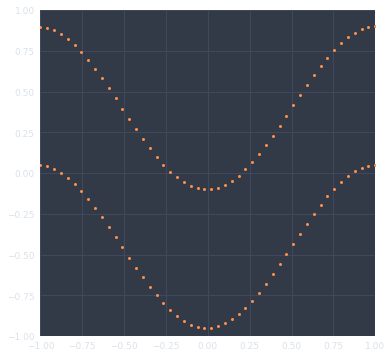

In [3]:
%run jupyter_importer.ipynb
import visual_kit

feature_input_s = x_s_train
visual_kittransform_visualization(feature_input_s)